<a href="https://colab.research.google.com/github/LAKSHYAMEWARA0025/ML/blob/main/PCA%2Bt_SNE%2BUMAPipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
f1=np.random.rand(100) #100 represents no of andom values you want
f2=np.random.rand(100) * 1000
f3=np.random.rand(100) * 50

In [4]:
df=pd.DataFrame({"Feature 1":f1,"Feature 2":f2,"Feature 3":f3})
df.head()

,Feature 1,Feature 2,Feature 3
0,0.140656,434.251534,41.708625
1,0.469391,683.961996,44.627328
2,0.390994,441.880363,39.634927
3,0.139640,881.261107,31.386263
4,0.943776,915.550151,26.625565


In [5]:
pca_no_scale=PCA(n_components=2) #by default n_components=no of features only
pca_no_scale.fit(df)
print(np.round(pca_no_scale.explained_variance_ratio_,3))

[0.997 0.003]


In [6]:
scaler=StandardScaler()

In [7]:
scaled_data=scaler.fit_transform(df)

In [8]:
pca_scaled=PCA(n_components=3)
pca_scaled.fit(scaled_data)
print(np.round(pca_scaled.explained_variance_ratio_,2))

[0.4  0.33 0.27]


**Visualising MNIST dataset using PCA and t-SNE and UMAP**

In [9]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from time import time

In [10]:
#Now we'll load the MNIST dataset
mnist=fetch_openml('mnist_784',version=1,as_frame=False)
X,y=mnist.data,mnist.target.astype(int)
print("Shape of X: ",X.shape)

Shape of X:  (70000, 784)


In [11]:
#We are taking smaller subset in order to reduce computational-cost and time
subset=10000
X=X[:subset]
y=y[:subset]

In [12]:
#Scaling the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [13]:
#PCA
starting_time=time()
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
print("Time taken for PCA: ",time()-starting_time)

Time taken for PCA:  1.060004472732544


In [14]:
#t-SNE
st_time=time()
tsne=TSNE(n_components=2,perplexity=30,random_state=42,n_iter=1000)
X_tsne=tsne.fit_transform(X_scaled)
print("Time taken for t-SNE: ",time()-st_time)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Time taken for t-SNE:  132.08429408073425


In [15]:
#UMAP
start_time=time()
reducer=umap.UMAP(n_components=2,n_neighbors=15,min_dist=0.1,random_state=42)
X_umap=reducer.fit_transform(X_scaled)
print("Time taken for UMAP: ",time()-start_time)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Time taken for UMAP:  45.832115173339844


In [16]:
#Creating a function to visuaalize results
def plot_embedding(X_embedded,title):
  plt.figure(figsize=(8,6))
  plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y,cmap='tab10',s=5)
  plt.colorbar()
  plt.title(title,fontsize=14)
  plt.xlabel("Component 1")
  plt.ylabel("Component 2")
  plt.show()

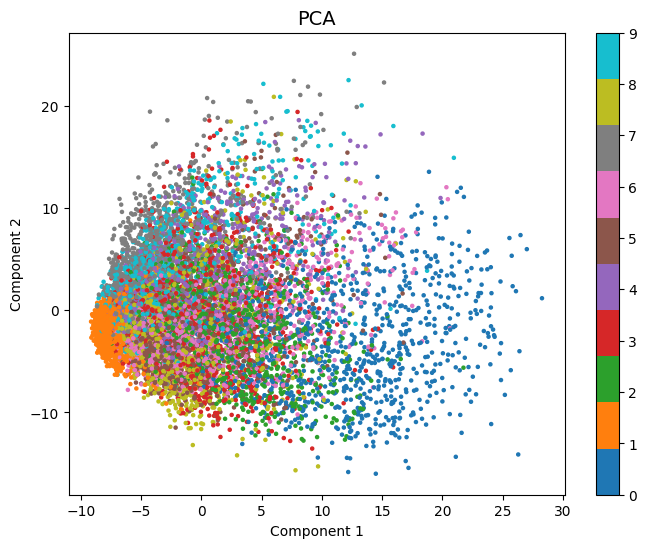

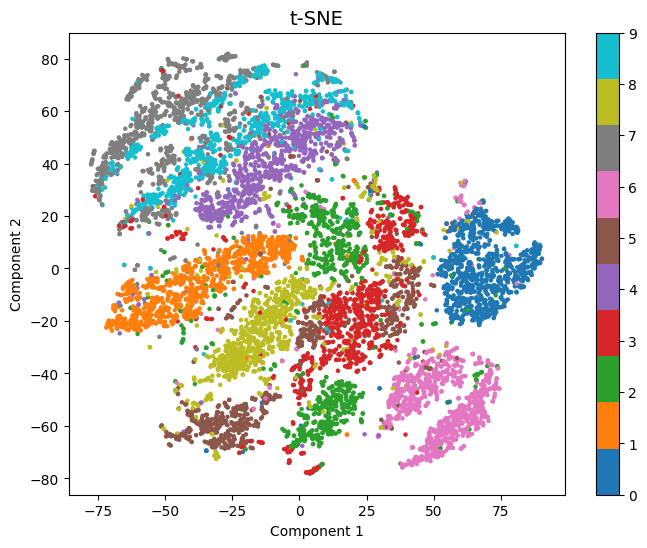

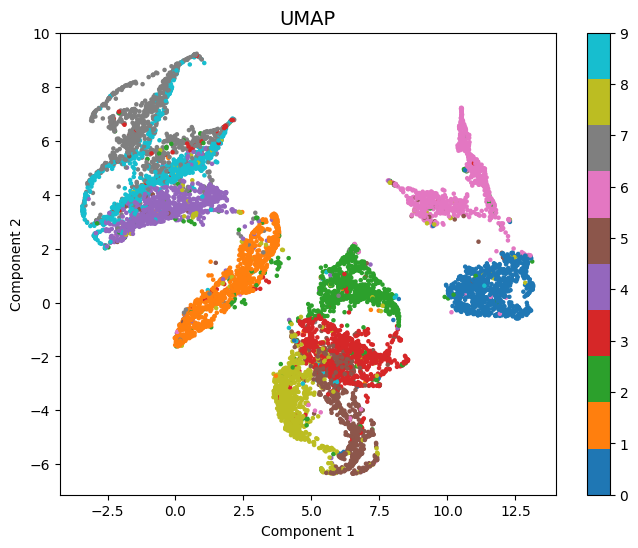

In [17]:
#Plotting the results
plot_embedding(X_pca,"PCA")
plot_embedding(X_tsne,"t-SNE")
plot_embedding(X_umap,"UMAP")